In [47]:
import random
import numpy as np
import matplotlib.pyplot as plt

class BanditNonStat:

    def __init__(self, n):
        self.N = n
        # All rewards start out equal
        self.R = np.zeros(n) + 5         
        self.std = 0.01
        # standard deviation of the normal distribution

    def actions(self):
        actions = list(range(self.N))
        return actions

    def reward(self, arm):
        # taking a random walk by mean 0, and std 0.01
        # At each time step
        for i in range(self.N):
          self.R[i] = self.R[i]+ np.random.normal(0, self.std)
        return self.R[arm]

In [48]:

def modified_epsilon_greedy(bandit, epsilon, alpha, iterations):
    Q=[0]*bandit.N # Q denotes value returned when taken action a
    ct=[0]*bandit.N # Count for number of times each arm were pulled
    total_reward = 0  # total reward accumulated so far
    avgrpi = []  # list to store the average reward per iteration
    rpi=[]
    all_estimates = np.zeros((iterations, bandit.N)) # array of Q which stores estimates for each iteration

    for i in range(iterations):
        rand = random.random()

        if rand <= epsilon:
            arm = random.choice(bandit.actions())
        else:
            arm = Q.index(max(Q))  # choose the arm with highest value

        reward = bandit.reward(arm)
        rpi.append(reward)
        ct[arm] += 1 # increase the count
        Q[arm] += alpha * (reward - Q[arm])
        all_estimates[i]=Q #stores estimates individually at each step
        total_reward += reward  # accumulate the reward
        # calculate the average reward per iteration and append it to the list
        avgrpi.append(total_reward / (i + 1))
    print(f'Actual Rewards at this moment :{[round(num, 3) for num in bandit.R] }')
    print(f'Average of all Reward observed {[round(num, 3) for num in Q]}')
    print(f'Number of times each arm were pulled     {ct} ')

    x= [str(num+1) for num in bandit.actions()]
    fig = plt.figure(figsize=(8,6))
    plt.bar(x, ct)
    plt.title('Number of times each action was taken')
    plt.xlabel('Action')
    plt.ylabel('Count')
    plt.show()
    
    fig = plt.figure(figsize=(8,6))
    plt.plot(rpi)
    plt.xlabel('Iteration')
    plt.ylabel('reward')
    plt.show()
      
    fig = plt.figure(figsize=(8,6))
    for i in range(bandit.N):
        plt.plot(range(iterations), all_estimates[:, i], label=f'Arm {i+1}')
    plt.xlabel('Iteration')
    plt.ylabel('Estimated reward')
    plt.title('Estimated rewards over time for each arm of the bandit')
    plt.legend()

    fig = plt.figure(figsize=(8,6))
    plt.plot(avgrpi)
    plt.xlabel('Iteration')
    plt.ylabel('Average reward')  
    return Q,ct
    


Actual Rewards at this moment :[5.537, 4.106, 3.973, 5.035, 5.858, 6.973, 4.72, 6.372, 2.896, 4.77]
Average of all Reward observed [5.505, 3.92, 3.846, 4.954, 5.914, 6.951, 4.674, 6.22, 2.862, 4.833]
Number of times each arm were pulled     [1001, 194, 208, 1831, 2193, 3757, 263, 189, 198, 166] 


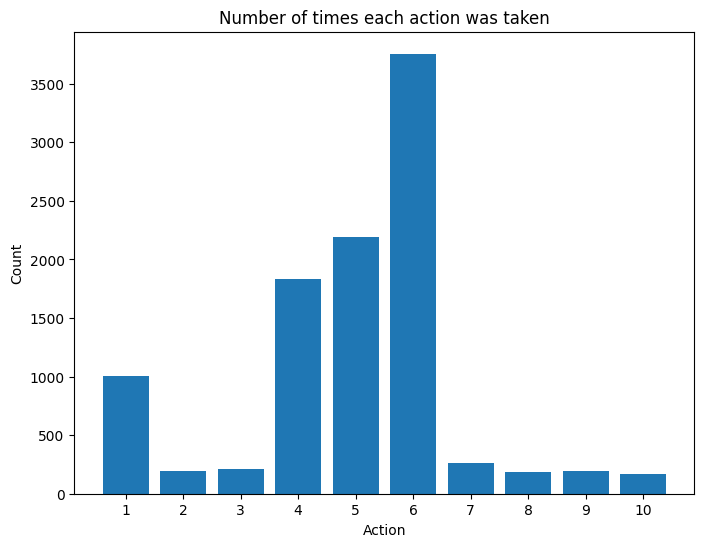

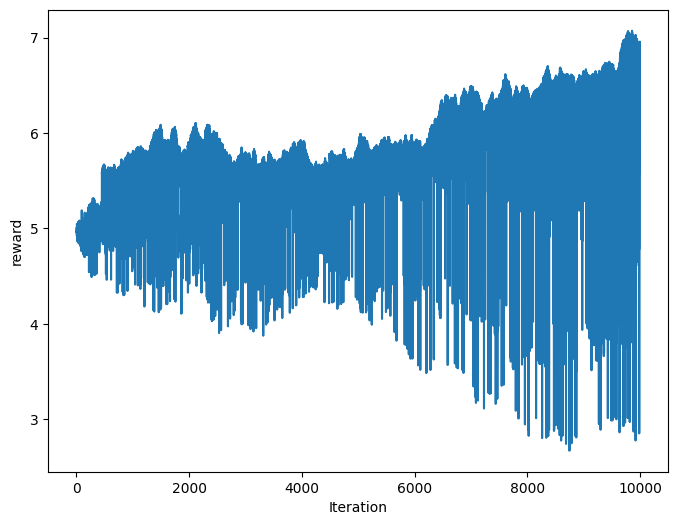

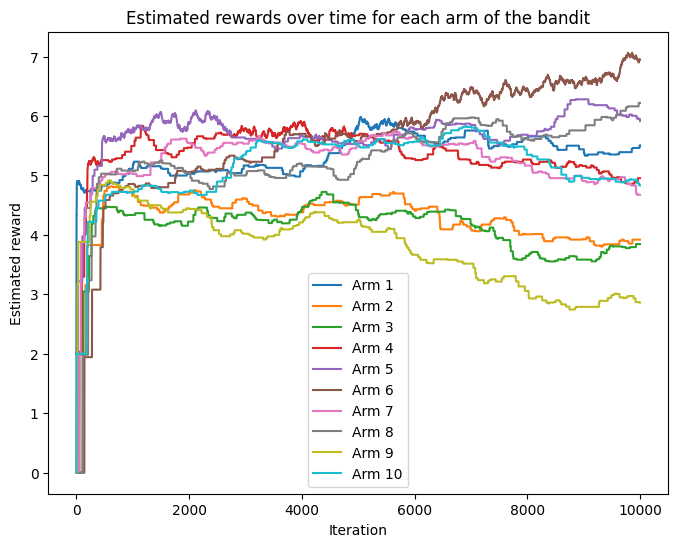

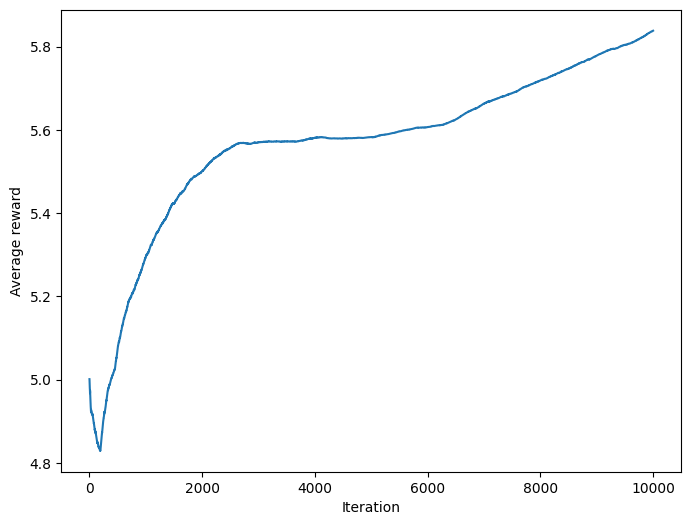

In [50]:
nonstat_bandit = BanditNonStat(10)
epsilon = 0.2
alpha = 0.4
iterations = 10000
Q, ct = modified_epsilon_greedy(nonstat_bandit, epsilon, alpha, iterations)
